In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy
import statsmodels
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix , classification_report,accuracy_score,roc_curve,auc,roc_auc_score

import warnings
warnings.filterwarnings("ignore")

In [2]:
data= pd.read_excel("Student-Employability-Datasets.xlsx")

In [3]:
data.shape

(2982, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Name of Student             2982 non-null   object
 1   GENERAL APPEARANCE          2982 non-null   int64 
 2   MANNER OF SPEAKING          2982 non-null   int64 
 3   PHYSICAL CONDITION          2982 non-null   int64 
 4   MENTAL ALERTNESS            2982 non-null   int64 
 5   SELF-CONFIDENCE             2982 non-null   int64 
 6   ABILITY TO PRESENT IDEAS    2982 non-null   int64 
 7   COMMUNICATION SKILLS        2982 non-null   int64 
 8   Student Performance Rating  2982 non-null   int64 
 9   CLASS                       2982 non-null   object
dtypes: int64(8), object(2)
memory usage: 233.1+ KB


In [5]:
data.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [6]:
data.head()

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [7]:
data.duplicated().sum()

0

In [8]:
data.nunique()

Name of Student               2982
GENERAL APPEARANCE               4
MANNER OF SPEAKING               4
PHYSICAL CONDITION               4
MENTAL ALERTNESS                 4
SELF-CONFIDENCE                  4
ABILITY TO PRESENT IDEAS         4
COMMUNICATION SKILLS             4
Student Performance Rating       3
CLASS                            2
dtype: int64

In [9]:
data.isnull().sum()

Name of Student               0
GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [10]:
data.CLASS.value_counts()

Employable        1729
LessEmployable    1253
Name: CLASS, dtype: int64

In [11]:
le=LabelEncoder()
data["CLASS"]=le.fit_transform(data["CLASS"])
data.CLASS.value_counts()

0    1729
1    1253
Name: CLASS, dtype: int64

In [12]:
data.shape

(2982, 10)

In [13]:
data.nunique()

Name of Student               2982
GENERAL APPEARANCE               4
MANNER OF SPEAKING               4
PHYSICAL CONDITION               4
MENTAL ALERTNESS                 4
SELF-CONFIDENCE                  4
ABILITY TO PRESENT IDEAS         4
COMMUNICATION SKILLS             4
Student Performance Rating       3
CLASS                            2
dtype: int64

In [14]:
data.drop(['Name of Student'],axis = 1,inplace = True)

In [15]:
data_numeric=data.select_dtypes(include=np.number)
data_numeric

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,4,5,4,5,5,5,5,5,0
1,4,4,4,4,4,4,3,5,0
2,4,3,3,3,3,3,2,5,1
3,3,3,3,2,3,3,3,5,1
4,4,4,3,3,4,4,3,5,0
...,...,...,...,...,...,...,...,...,...
2977,4,3,3,3,3,3,2,5,0
2978,3,4,4,4,4,4,4,5,0
2979,4,5,4,5,4,4,4,5,0
2980,4,4,4,3,4,4,3,5,1


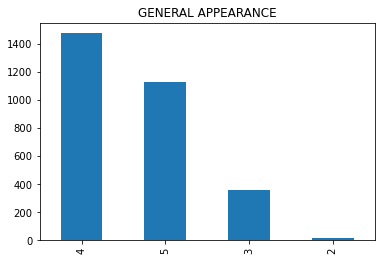

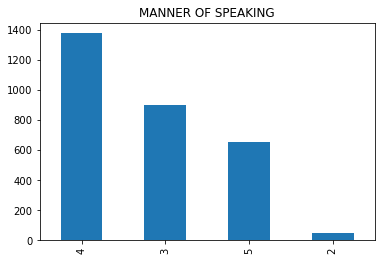

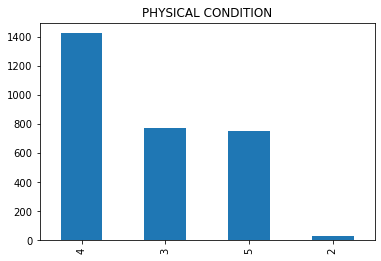

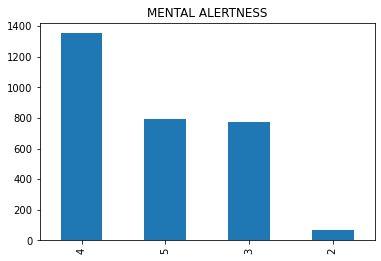

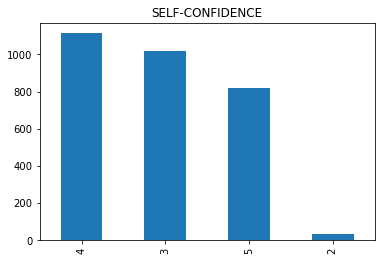

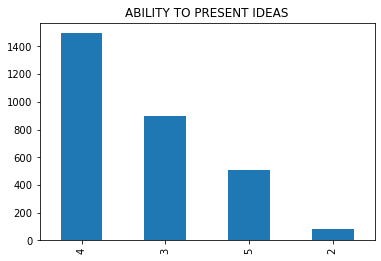

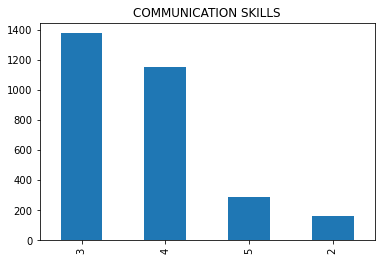

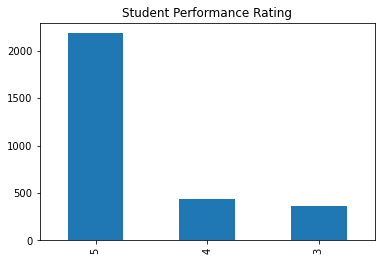

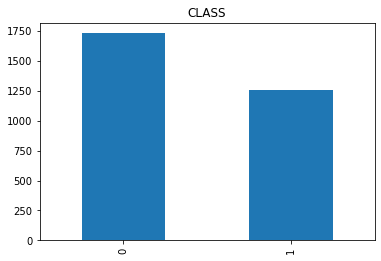

In [16]:
for column in data:
    plt.figure()
    data[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.show()

# statical test for continous data

In [17]:
data['CLASS']=data['CLASS'].astype("int")

In [18]:
data.columns

Index(['GENERAL APPEARANCE', 'MANNER OF SPEAKING', 'PHYSICAL CONDITION',
       'MENTAL ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS',
       'COMMUNICATION SKILLS', 'Student Performance Rating', 'CLASS'],
      dtype='object')

In [19]:
data.columns = data.columns.str.replace(' ', '_')

In [20]:
data.rename(columns = {'SELF-CONFIDENCE':'SELF_CONFIDENCE'},inplace = True)

In [21]:
data.columns

Index(['GENERAL_APPEARANCE', 'MANNER_OF_SPEAKING', 'PHYSICAL_CONDITION',
       'MENTAL_ALERTNESS', 'SELF_CONFIDENCE', 'ABILITY_TO_PRESENT_IDEAS',
       'COMMUNICATION_SKILLS', 'Student_Performance_Rating', 'CLASS'],
      dtype='object')

In [22]:
model = ols('GENERAL_APPEARANCE ~ CLASS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
CLASS,1.0,18.604109,18.604109,40.953374,1.804450e-10
Residual,2980.0,1353.740626,0.454275,NaN,NaN


In [23]:
model = ols('MANNER_OF_SPEAKING ~ CLASS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
CLASS,1.0,66.896447,66.896447,121.450572,1.036242e-27
Residual,2980.0,1641.420119,0.550812,NaN,NaN


In [24]:
model = ols('PHYSICAL_CONDITION~CLASS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
CLASS,1.0,44.658767,44.658767,82.864605,1.568193e-19
Residual,2980.0,1606.031038,0.538937,NaN,NaN


In [25]:
model = ols('MENTAL_ALERTNESS~CLASS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
CLASS,1.0,74.956839,74.956839,127.79331,4.819466e-29
Residual,2980.0,1747.911371,0.586547,NaN,NaN


In [26]:
model = ols('SELF_CONFIDENCE ~ CLASS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
CLASS,1.0,38.955493,38.955493,60.928119,8.130184e-15
Residual,2980.0,1905.316807,0.639368,NaN,NaN


In [27]:
model = ols('ABILITY_TO_PRESENT_IDEAS ~ CLASS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
CLASS,1.0,22.479910,22.479910,41.68061,1.250210e-10
Residual,2980.0,1607.225322,0.539337,NaN,NaN


In [28]:
model = ols('COMMUNICATION_SKILLS ~ CLASS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
CLASS,1.0,29.113546,29.113546,53.539691,3.242509e-13
Residual,2980.0,1620.449499,0.543775,NaN,NaN


In [29]:
model = ols('Student_Performance_Rating ~ CLASS',data =data).fit()
anova = sm.stats.anova_lm(model)
anova

,df,sum_sq,mean_sq,F,PR(>F)
CLASS,1.0,0.000967,0.000967,0.002013,0.964216
Residual,2980.0,1430.979919,0.480195,NaN,NaN


In [30]:
data.drop(columns= ['Student_Performance_Rating'], axis= 1, inplace= True)

# Logistic regression

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2982 entries, 0 to 2981
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   GENERAL_APPEARANCE        2982 non-null   int64
 1   MANNER_OF_SPEAKING        2982 non-null   int64
 2   PHYSICAL_CONDITION        2982 non-null   int64
 3   MENTAL_ALERTNESS          2982 non-null   int64
 4   SELF_CONFIDENCE           2982 non-null   int64
 5   ABILITY_TO_PRESENT_IDEAS  2982 non-null   int64
 6   COMMUNICATION_SKILLS      2982 non-null   int64
 7   CLASS                     2982 non-null   int32
dtypes: int32(1), int64(7)
memory usage: 174.9 KB


In [32]:
data.columns

Index(['GENERAL_APPEARANCE', 'MANNER_OF_SPEAKING', 'PHYSICAL_CONDITION',
       'MENTAL_ALERTNESS', 'SELF_CONFIDENCE', 'ABILITY_TO_PRESENT_IDEAS',
       'COMMUNICATION_SKILLS', 'CLASS'],
      dtype='object')

In [33]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [35]:
lr=LogisticRegression()

In [36]:
model=lr.fit(X_train,y_train)

In [37]:
y_pred=model.predict(X_test)

In [38]:
confusion_matrix(y_test,y_pred)

array([[260,  72],
       [170,  95]], dtype=int64)

In [39]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.60      0.78      0.68       332
           1       0.57      0.36      0.44       265

    accuracy                           0.59       597
   macro avg       0.59      0.57      0.56       597
weighted avg       0.59      0.59      0.57       597



In [40]:
# roc curve
y_pred_prob=model.predict_proba(X_test)
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob[:,1])
roc_auc=auc(fpr,tpr)
print(roc_auc)

0.6400716071834508


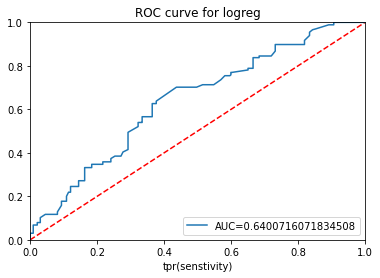

In [41]:
#roc curve
plt.title("ROC curve for logreg")
plt.xlabel("fpr(1-specificity)")
plt.xlabel("tpr(senstivity)")
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot(fpr,tpr,label="AUC="+str(roc_auc))
plt.legend(loc=4)
plt.show()

# DECISION TREE

In [42]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state = 86)

In [43]:
model_params = {'criterion' : ['gini','entropy'],
                'max_depth': [1,2,3,4,5,6,7,8,9,None]}

In [44]:
from sklearn.model_selection import GridSearchCV
search = GridSearchCV(dt,model_params,cv = 10)
search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=86),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, None]})

In [45]:
search.best_params_

{'criterion': 'gini', 'max_depth': None}

In [46]:
dtree2 = DecisionTreeClassifier(criterion= 'gini', max_depth = None,random_state = 86)

In [47]:
model = dtree2.fit(X_train,y_train)

In [48]:
y_pred = model.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [50]:
accuracy_score(y_pred,y_test)

0.8358458961474037

In [51]:
print(confusion_matrix(y_pred,y_test))

[[305  71]
 [ 27 194]]


In [52]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86       376
           1       0.73      0.88      0.80       221

    accuracy                           0.84       597
   macro avg       0.83      0.84      0.83       597
weighted avg       0.85      0.84      0.84       597



In [53]:
roc_auc_score(y_pred,y_test)

0.8444991335323

In [54]:
y_pred_prob = model.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.9481700386451466

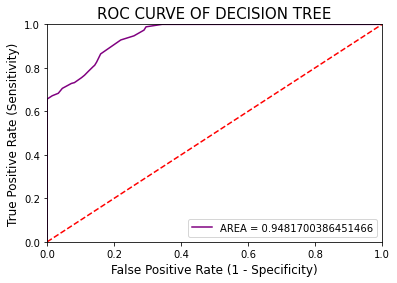

In [55]:
plt.plot(fpr,tpr,'purple',label = 'AREA = ' +str(roc_auc));
plt.legend(loc = 4);
plt.plot([0,1],[0,1],'--r');
plt.xlim([0,1]);
plt.ylim([0,1]);
plt.title('ROC CURVE OF DECISION TREE',size = 15);
plt.xlabel('False Positive Rate (1 - Specificity)',size = 12);
plt.ylabel('True Positive Rate (Sensitivity)',size = 12);

# RANDOM FOREST

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = 86)

In [57]:
params = {'n_estimators':[20,40,60,80,100],
          'max_features':['sqrt',0.25,0.50,0.75,1],
          'min_samples_split':[2,4,6]}

In [58]:
from sklearn.model_selection import RandomizedSearchCV
search = RandomizedSearchCV(rf,params,cv = 10,random_state = 8)
search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=86),
                   param_distributions={'max_features': ['sqrt', 0.25, 0.5,
                                                         0.75, 1],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [20, 40, 60, 80, 100]},
                   random_state=8)

In [59]:
search.best_params_

{'n_estimators': 20, 'min_samples_split': 4, 'max_features': 0.5}

In [60]:
rf2 = RandomForestClassifier(n_estimators = 20,min_samples_split = 4,max_features = 0.5,random_state = 86)
model_rf = rf2.fit(X_train,y_train)

In [61]:
y_pred = model_rf.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_curve,auc,roc_auc_score

In [63]:
accuracy_score(y_pred,y_test)

0.8341708542713567

In [64]:
print(confusion_matrix(y_pred,y_test))

[[298  65]
 [ 34 200]]


In [65]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86       363
           1       0.75      0.85      0.80       234

    accuracy                           0.83       597
   macro avg       0.83      0.84      0.83       597
weighted avg       0.84      0.83      0.84       597



In [66]:
roc_auc_score(y_pred,y_test)

0.8378187469096561

In [67]:
y_pred_prob = model_rf.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.9476415094339623

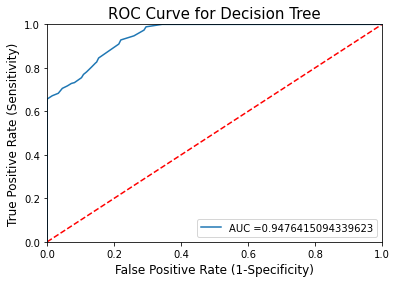

In [68]:
plt.title('ROC Curve for Decision Tree',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

# ADABOOST

In [69]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [70]:
ada = AdaBoostClassifier(random_state = 86)

In [71]:
params = {'n_estimators' : [i for i in range(0,500,50)],
         'learning_rate':[1.0,0.2,0.1,0.01,0.05,0.001]}

In [72]:
from sklearn.model_selection import RandomizedSearchCV

In [73]:
search = RandomizedSearchCV(ada,params,cv = 10)

In [74]:
search.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=86),
                   param_distributions={'learning_rate': [1.0, 0.2, 0.1, 0.01,
                                                          0.05, 0.001],
                                        'n_estimators': [0, 50, 100, 150, 200,
                                                         250, 300, 350, 400,
                                                         450]})

In [75]:
search.best_params_

{'n_estimators': 100, 'learning_rate': 0.2}

In [76]:
ada2 = AdaBoostClassifier(n_estimators= 300, learning_rate = 1)

In [77]:
model_ada = ada2.fit(X_train,y_train)

In [78]:
y_pred = ada2.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc,roc_auc_score

In [80]:
accuracy_score(y_test,y_pred)

0.6432160804020101

In [81]:
print(confusion_matrix(y_test,y_pred))

[[264  68]
 [145 120]]


In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.65      0.80      0.71       332
           1       0.64      0.45      0.53       265

    accuracy                           0.64       597
   macro avg       0.64      0.62      0.62       597
weighted avg       0.64      0.64      0.63       597



In [83]:
y_pred_prob = model_ada.predict_proba(X_test)
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])
roc_auc = auc(fpr,tpr)
roc_auc

0.680546715162537

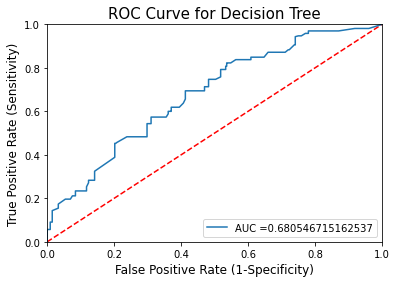

In [84]:
plt.title('ROC Curve for Decision Tree',size = 15)
plt.xlabel('False Positive Rate (1-Specificity)',size = 12)
plt.ylabel('True Positive Rate (Sensitivity)',size = 12)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.plot(fpr, tpr, label = 'AUC =' +str(roc_auc))
plt.legend(loc=4) #Location of label
plt.show()

In [85]:
roc_auc_score(y_test,y_pred)

0.6240054557854058